In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fastai2.text.all import *
import PIL
from util import *

In [18]:
path =  Path('/home/jupyter/VLP')
'''df = pd.read_csv(path/'captioned10000.csv')
df =df.drop('Unnamed: 0' ,1)
df.loc[:8499, 'is_valid'] = False
df.loc[8500:8999, 'is_valid']= True
df.loc[9000:, 'is_valid']=None
df['tex_cap'] = df['caption'] + ' <meme> ' + df['text']
df.to_csv(path/'captioned.csv',index=False)
'''
df  = pd.read_csv(path/'captioned.csv')
df

,id,img,label,text,caption,is_valid,tex_cap
0,42953,img/42953.png,0.0,its their character not their color that matters,A man in a black shirt is looking at the camera .,False,A man in a black shirt is looking at the camera . <meme> its their character not their color that matters
1,23058,img/23058.png,0.0,don't be afraid to love again everyone is not like your ex,A man in a suit is talking to a woman in a white shirt .,False,A man in a suit is talking to a woman in a white shirt . <meme> don't be afraid to love again everyone is not like your ex
2,13894,img/13894.png,0.0,putting bows on your pet,A cat with a red bow tied around its neck sits next to a pillow .,False,A cat with a red bow tied around its neck sits next to a pillow . <meme> putting bows on your pet
3,37408,img/37408.png,0.0,i love everything and everybody! except for squirrels i hate squirrels,A black dog is looking at the camera .,False,A black dog is looking at the camera . <meme> i love everything and everybody! except for squirrels i hate squirrels
4,82403,img/82403.png,0.0,"everybody loves chocolate chip cookies, even hitler",A man in a suit is talking .,False,"A man in a suit is talking . <meme> everybody loves chocolate chip cookies, even hitler"
...,...,...,...,...,...,...,...
9995,3869,img/03869.png,NaN,a mother's love for the child is a divine thing,Three squirrels are sitting on a table .,NaN,Three squirrels are sitting on a table . <meme> a mother's love for the child is a divine thing
9996,23817,img/23817.png,NaN,sea monkeys,A dog shaking off water .,NaN,A dog shaking off water . <meme> sea monkeys
9997,56280,img/56280.png,NaN,little miss muffet sat on her tuffet,A man in a blue suit is sitting in a chair .,NaN,A man in a blue suit is sitting in a chair . <meme> little miss muffet sat on her tuffet
9998,29384,img/29384.png,NaN,they're in a row,Two green and yellow portable toilets .,NaN,Two green and yellow portable toilets . <meme> they're in a row


In [4]:
#to_drop = pd.read_csv(path/'to_drop.csv')

In [19]:
df[df.id.isin(to_drop.id)]

,id,img,label,text,caption,is_valid,tex_cap
117,20568,img/20568.png,0.0,meanwhile at the isis strip club,A group of men and a sheep .,False,A group of men and a sheep . <meme> meanwhile at the isis strip club
267,35097,img/35097.png,0.0,meanwhile at the isis strip club,A group of men and a sheep .,False,A group of men and a sheep . <meme> meanwhile at the isis strip club
613,97542,img/97542.png,0.0,meanwhile at the isis strip club,A man in a white cap is surrounded by sheep .,False,A man in a white cap is surrounded by sheep . <meme> meanwhile at the isis strip club
740,19247,img/19247.png,0.0,i only wear silk panties cotton ones remind me of slavery,A man in a black suit is speaking into a microphone .,False,A man in a black suit is speaking into a microphone . <meme> i only wear silk panties cotton ones remind me of slavery
807,75203,img/75203.png,1.0,i only wear silk panties cotton ones remind me of slavery,A man in a black suit speaking into a microphone .,False,A man in a black suit speaking into a microphone . <meme> i only wear silk panties cotton ones remind me of slavery
...,...,...,...,...,...,...,...
7583,71658,img/71658.png,0.0,meanwhile at the isis strip club,A group of people posing for a picture .,False,A group of people posing for a picture . <meme> meanwhile at the isis strip club
7757,3847,img/03847.png,0.0,meanwhile at the isis strip club,A group of men and a sheep .,False,A group of men and a sheep . <meme> meanwhile at the isis strip club
7773,5914,img/05914.png,0.0,meanwhile at the isis strip club,A group of people are standing in a field .,False,A group of people are standing in a field . <meme> meanwhile at the isis strip club
8004,58732,img/58732.png,0.0,meanwhile at the isis strip club,A man in a white hat is standing next to a group of sheep .,False,A man in a white hat is standing next to a group of sheep . <meme> meanwhile at the isis strip club


In [6]:
#df =df.drop(df[df.id.isin(to_drop.id)].index)

In [20]:
HATE_PATH = Path('/home/jupyter/mmf_data/datasets/hateful_memes/defaults/')

In [26]:
df_train_val = df[:-1000]
len(df_train_val)

9000

In [27]:
df_train_hate = df_train_val[df_train_val.is_valid==False][df_train_val.label==1]
len(df_train_hate)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


3050

In [28]:
df_train_val = pd.concat([df_train_hate]+[df_train_val], ignore_index=True)
len(df_train_val)

12050

In [29]:
bad_file = Path('bad_words.txt').read_text() #https://www.freewebheaders.com/bad-words-list-and-page-moderation-words-list-for-facebook/
bad_words = set(bad_file.split(','))
len(bad_words)

1555

In [30]:
corpus =' '.join([x for x in df.tex_cap])
len(corpus)

1104248

In [31]:
spacy = WordTokenizer()
toks = first(spacy([corpus]))
print(coll_repr(toks, 30))

tkn = Tokenizer(spacy)
coll_repr(tkn(corpus), 30)

max([len(tkn(row['text'])) + len(tkn(row['caption'])) for _,row in df.iterrows()])

(#255604) ['A','man','in','a','black','shirt','is','looking','at','the','camera','.','<','meme','>','its','their','character','not','their','color','that','matters','A','man','in','a','suit','is','talking'...]


87

In [32]:
tokens = tkn(corpus)
tokens

num = Numericalize()

num.setup([tkn(corpus)])

whole_vocab = num.vocab
len(whole_vocab)

4328

In [33]:
from fastai2.text.models.core import _model_meta
meta =_model_meta[AWD_LSTM]
model_path = untar_data(meta['url'], c_key='model')
fnames = [list(model_path.glob(f'*.{ext}'))[0] for ext in ['pth', 'pkl']]
pretrained_vocab = fnames[1].load()
len(pretrained_vocab)

60000

In [34]:
missing = set(num.vocab) - set(pretrained_vocab)
L(missing)[:10]

(#10) ['lyin','islamophobia','accidently','antifa','fuckers','humper',"put'n",'non-','hmm','handstand']

In [35]:
miss_count = [(m, tokens.count(m)) for m in missing]
sorted(miss_count, key = lambda x:-x[1])[:20]

[("n't", 1095),
 ("'m", 483),
 ('dishwasher', 144),
 ("'ve", 114),
 ('tranny', 110),
 ("''", 80),
 ('headscarf', 45),
 ('ilhan', 41),
 ('fucker', 33),
 ('closeup', 29),
 ('illegals', 26),
 ('sweatshirt', 23),
 ('hoodie', 21),
 ('bowtie', 20),
 ('hijab', 18),
 ('tlaib', 17),
 ('petting', 16),
 ('fuckers', 15),
 ('defund', 15),
 ('niggers', 15)]

## Language Model

In [36]:
class ExplToken(Transform):
    def __init__(self, bad_words):
        self.bad_words = bad_words
    def encodes(self, tokens):
        res =[]
        for t in tokens:
            if t in bad_words: 
                res.append('xxexpl')
                #print('adding for', t)
            res.append(t)
        return res

In [37]:
blocks = [TextBlock.from_df('tex_cap', None, is_lm=True, seq_len=80)]
tfms = blocks[0].type_tfms
tfms[0].special_toks.append('xxexpl')
blocks[0].type_tfms = tfms[:1] + [ExplToken(bad_words)] + tfms[1:]
splitter = RandomSplitter(.1)
dblock = DataBlock(blocks=blocks, get_x=ColReader('text'), splitter=splitter)
#dls_lm = TextDataLoaders.from_df(df, path, text_col='tex_cap', valid_pct=.1, is_lm = True, seq_len=80, bs=128)
dls_lm = DataLoaders.from_dblock(dblock, df, seq_len=80, bs=128)

In [38]:
dls_lm.show_batch(max_n=10)

,text,text_
0,xxbos a black and white photo of a car show . < meme > can you spot the difference ? ! ? ! ? did n't take me long either - 1st car 's red xxbos a girl in a yellow shirt is kicking a football . < meme > found this old photo of our grand parents on their xxunk xxbos xxmaj two women are applying mascara . < meme > black friday deal buy one get one free,a black and white photo of a car show . < meme > can you spot the difference ? ! ? ! ? did n't take me long either - 1st car 's red xxbos a girl in a yellow shirt is kicking a football . < meme > found this old photo of our grand parents on their xxunk xxbos xxmaj two women are applying mascara . < meme > black friday deal buy one get one free toaster
1,is smiling . < meme > a smile is worth a thousand words xxbos a black and white picture of a man . < meme > game of throne team are thinking about building a documentary about xxexpl hitler xxbos a woman in a white robe is smiling . < meme > it 's a boy xxbos a man in a blue shirt is speaking into a microphone . < meme > there 's so much xxexpl crap in this,smiling . < meme > a smile is worth a thousand words xxbos a black and white picture of a man . < meme > game of throne team are thinking about building a documentary about xxexpl hitler xxbos a woman in a white robe is smiling . < meme > it 's a boy xxbos a man in a blue shirt is speaking into a microphone . < meme > there 's so much xxexpl crap in this the
2,"killers in the world xxunk the same . "" xxunk "" lol , okay xxexpl faggot . "" xxunk xxbos a woman with a black hat and sunglasses . < meme > if your man dresses like this there no doubt he 's cold xxbos a man and a woman are playing chess . < meme > i win again ! game center xxbos a cartoon dog with a star on his head . < meme > it says right","in the world xxunk the same . "" xxunk "" lol , okay xxexpl faggot . "" xxunk xxbos a woman with a black hat and sunglasses . < meme > if your man dresses like this there no doubt he 's cold xxbos a man and a woman are playing chess . < meme > i win again ! game center xxbos a cartoon dog with a star on his head . < meme > it says right here"
3,xxexpl fucker jokes xxbos a man giving a speech . < meme > the xxexpl xxunk way to eat xxunk noodles : 1 . boil water 2 . eat block of xxunk 3 . drink xxunk water 4 . snort xxunk powder 5 xxexpl fuck xxexpl bitches xxbos xxmaj older man smoking a cigarette . < meme > the people who give a xxexpl fuck are right over there xxbos a man in a blue shirt is shaking hands with,fucker jokes xxbos a man giving a speech . < meme > the xxexpl xxunk way to eat xxunk noodles : 1 . boil water 2 . eat block of xxunk 3 . drink xxunk water 4 . snort xxunk powder 5 xxexpl fuck xxexpl bitches xxbos xxmaj older man smoking a cigarette . < meme > the people who give a xxexpl fuck are right over there xxbos a man in a blue shirt is shaking hands with a
4,? i worked 60 years for my masters xxbos a baby is being held by a woman . < meme > when ur too young to know the xxunk of racism but ur happy cause u got a new pet xxbos a woman is holding a small child . < meme > this is what science does for humanity this is what islam does for humanity xxbos a woman in a red and black dress holding a trophy . <,i worked 60 years for my masters xxbos a baby is being held by a woman . < meme > when ur too young to know the xxunk of racism but ur happy cause u got a new pet xxbos a woman is holding a small child . < meme > this is what science does for humanity this is what islam does for humanity xxbos a woman in a red and black dress holding a trophy . < meme
5,shirt smiles . < meme > finally finding the right xxunk you need indian xxunk xxbos a woman in a red dress is playing the drums . < meme > fresh out of xxunk bomb xxunk xxbos a man in a tuxedo is wearing a bowtie . < meme > oh you talk so tough from behind your keyboard tell me again what a xxunk you are xxbos there is a big pile of debris . < meme > our,smiles . < meme > finally finding the right xxunk y

In [39]:
learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.3, 
    metrics=[accuracy, Perplexity()])
learn.fine_tune(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,5.131968,3.636229,0.355577,37.948475,00:13


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.545546,3.192111,0.421072,24.339748,00:14
1,3.351683,2.991701,0.446908,19.919544,00:14
2,3.184339,2.866646,0.460872,17.577959,00:14
3,3.036889,2.787672,0.468761,16.243166,00:14
4,2.904616,2.738323,0.473861,15.461039,00:14
5,2.789129,2.703597,0.480349,14.933348,00:14
6,2.694874,2.684499,0.483713,14.650860,00:14
7,2.612838,2.672259,0.485254,14.472631,00:13
8,2.553637,2.667641,0.486274,14.405951,00:13
9,2.519857,2.667382,0.485276,14.402208,00:14


In [51]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,2.463816,2.678810,0.484570,14.567745,00:14
1,2.447849,2.659021,0.487910,14.282302,00:14
2,2.397047,2.627599,0.495202,13.840499,00:14
3,2.351863,2.620151,0.497630,13.737792,00:14
4,2.312452,2.617811,0.498340,13.705688,00:14


In [52]:
learn.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,2.252066,2.617228,0.498418,13.697695,00:14
1,2.254254,2.615882,0.498848,13.679278,00:14
2,2.252709,2.614136,0.499355,13.655419,00:14
3,2.242669,2.613965,0.499154,13.653079,00:14
4,2.254691,2.613635,0.499271,13.648568,00:14


In [53]:
learn.save_encoder('finetuned_ex')

In [54]:
TEXT = "A man"
N_WORDS = 40
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) 
         for _ in range(N_SENTENCES)]

print("\n".join(preds))

a man in a blue shirt is lying in front of a stove . < meme > when your mom was so xxexpl raped by a man a little girl in a white tank top is standing with her arms crossed
a man in a blue shirt is smiling . < meme > white people do n't shoot it but they xxexpl kill you a man with glasses is raising his hands . < meme > we do n't have to load


## Classifier

In [40]:
len(dls_lm.vocab)

4336

In [126]:
blocks = [TextBlock.from_df('tex_cap', vocab = dls_lm.vocab, is_lm=False, seq_len=80), CategoryBlock]
tfms = blocks[0].type_tfms
tfms[0].special_toks.append('xxexpl')
blocks[0].type_tfms = tfms[:1] + [ExplToken(bad_words)] + tfms[1:]
splitter = ColSplitter('is_valid')
dblock = DataBlock(blocks=blocks, get_x=ColReader('text'), get_y=ColReader('label'), splitter=splitter)
dls = DataLoaders.from_dblock(dblock, df_train_val, path='.', seq_len=80, bs=128)

In [60]:
#dls = TextDataLoaders.from_df(df_train_val, path, text_vocab=dls_lm.vocab, text_col='tex_cap',label_col='label', valid_col='is_valid' )

In [83]:
dls.show_batch()

,text,category
0,"xxbos a man standing in the desert . < meme > housing , free gas , free xxunk , free healthcare and free education for my wives and children . to show xxunk for your xxunk , i 'll xxunk your 12 year old daughters , blow up your xxunk , planes and buses and xxunk hate through a xxunk xxunk in your local city and town xxunk with the purpose of turning your xxunk country into the same xxexpl shithole i xxunk took xxunk from , allahu akbar !",1.0
1,"xxbos a man standing in the desert . < meme > housing , free gas , free xxunk , free healthcare and free education for my wives and children . to show xxunk for your xxunk , i 'll xxunk your 12 year old daughters , blow up your xxunk , planes and buses and xxunk hate through a xxunk xxunk in your local city and town xxunk with the purpose of turning your xxunk country into the same xxexpl shithole i xxunk took xxunk from , allahu akbar !",1.0
2,"xxbos a woman in a white shirt is smiling . < meme > "" nobody is trying to take your guns ! "" "" we only want to make you xxunk them , xxunk xxunk , ban xxunk guns , xxunk magazine xxunk , xxunk carrying them , ban or xxunk ammo , make other xxunk laws , and , if we catch you xxunk any of these made - up rules , throw you in prison … . at which point we will take your guns ! "" xxpad",0.0
3,xxbos a man in a suit is speaking into a microphone . < meme > president trump accused of xxexpl sexual assault right before the election xxunk xxunk accused xxexpl sexual harassment right before the election right before getting voted in by the senate xxunk xxunk accused of xxexpl sexual assault right before senate election in alabama brett kavanaugh accused of xxexpl sexual assault right before getting voted in by the senate still convinced that the xxunk are telling the truth ? xxunk e xxunk monday at xxunk pm xxpad,0.0
4,"xxbos a girl with long brown hair is looking at the camera . < meme > have you ever xxunk the history of the jews ? did you know that they have always xxunk together as a tribe , infiltrated xxunk , xxunk the financial xxunk of nations xxunk wars and xxunk created chaos in xxunk ? the jews have mass murdered millions of non- jews over the xxunk they xxunk seized control of the media so you 'll never find out study the history of the jews ! xxpad",1.0
5,xxbos a man in a black hat is digging in the sand . < meme > xxunk you killed me so the jew could control your media so the jews could control your banks so the jews control you money so the jews could control your government so your children could die for israel so foreigners could destroy your cities so foreigners could run your civil and public services so you become a prisoner in your own homes so your people and race are lost forever xxpad xxpad xxpad xxpad,1.0
6,xxbos a man in a black hat is digging in the sand . < meme > xxunk you killed me so the jew could control your media so the jews could control your banks so the jews control you money so the jews could control your government so your children could die for israel so foreigners could destroy your cities so foreigners could run your civil and public services so you become a prisoner in your own homes so your people and race are lost forever xxpad xxpad xxpad xxpad,1.0
7,"xxbos a little girl eating ice cream . < meme > if a phobia is a fear , how can i be "" xxunk "" or transphobic "" ? who xxunk a man in a dress ? ! why would i fear a man who takes it up the xxexpl ass by another man ? xxunk , yes definitely . fear ? no way . the only fear i have is the xxunk of what society will look like if these people keep xxunk xxpad xxpad xxpad xxpad xxpad xxpad",1.0
8,"xxbos a large group of people are gathered outside . < meme > these people are not human they look like xxunk walk and talk like people sort of but they are xxunk xxunk you can not xxunk this evil in human form they are under the spell of evil and have no xxunk about xxexpl rape , xxexpl murder , torture xxexpl rape of children or murdering you . your 

In [127]:
len(dls.train_ds), len(dls.valid_ds)

(11479, 500)

In [128]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.95, metrics=[accuracy, RocAucBinary()])
learn = learn.load_encoder('finetuned_ex')

In [129]:
learn.fine_tune(20, 5e-3)

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.902640,0.680318,0.580000,0.589776,00:04


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.813869,0.677640,0.594000,0.601296,00:08
1,0.764385,0.675406,0.584000,0.609760,00:08
2,0.721874,0.679767,0.572000,0.610624,00:08
3,0.687999,0.668317,0.596000,0.634608,00:08
4,0.666182,0.672751,0.590000,0.631152,00:08
5,0.661358,0.656742,0.610000,0.652976,00:08
6,0.644198,0.662759,0.606000,0.650080,00:08
7,0.623435,0.671764,0.598000,0.655456,00:08
8,0.614842,0.663147,0.600000,0.660448,00:08
9,0.613414,0.664007,0.622000,0.669888,00:08


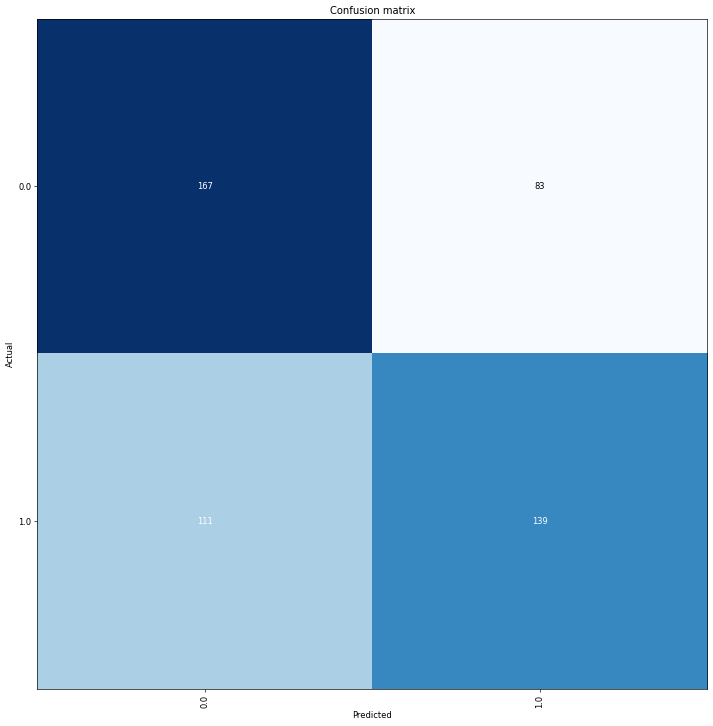

In [130]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [131]:
@typedispatch
def plot_top_losses(x: TensorText, y:TensorCategory, samples, outs, raws, losses, trunc_at=150, **kwargs):

    rows = get_empty_df(len(samples))
    samples = L((s[0].truncate(trunc_at),*s[1:]) for s in samples)
    for i,l in enumerate(['input', 'target']):
        rows = [b.show(ctx=c, label=l, **kwargs) for b,c in zip(samples.itemgot(i),rows)]
    outs = L(o + (TitledFloat(r.max().item()), TitledFloat(l.item())) for o,r,l in zip(outs, raws, losses))
    for i,l in enumerate(['predicted', 'probability', 'loss']):
        rows = [b.show(ctx=c, label=l, **kwargs) for b,c in zip(outs.itemgot(i),rows)]
    display_df(pd.DataFrame(rows))

In [132]:
interp.plot_top_losses(9, figsize=(15,11))

,input,target,predicted,probability,loss
0,xxbos a man in a black shirt is pointing at something . < meme > maybe if we were n't xxunk sources of crime we 'd be treated better xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,1.0,0.0,0.9918367266654968,4.808115005493164
1,xxbos a man with a beard is sitting in a chair . < meme > thank you for allowing me into your country now we need to talk about the things that need to change around here to xxunk my beliefs xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,1.0,0.0,0.970379650592804,3.5192954540252686
2,"xxbos a person with long brown hair is looking at something . < meme > busy , like a xxunk of bees , controlling what your family sees and xxunk all the news your hear so you 'll know what to think and fear till all the truth there is , is gone that is unless you stand , xxunk xxunk . """,1.0,0.0,0.9444287419319153,2.890089273452759
3,"xxbos a woman in a black and white dress is performing . < meme > they want to be accepted for who they are , yet xxunk able to accept themselves for who they are xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",1.0,0.0,0.9414770007133484,2.838334560394287
4,xxbos a man with no shirt on is standing next to another man with no shirt on . < meme > the proper way to pop a xxunk xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,1.0,0.0,0.9377847909927368,2.7771553993225098
5,"xxbos a man with a red headband smiles . < meme > "" islam is a religion of peace stop criticizing my religion "" xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",0.0,1.0,0.9191662669181824,2.5153610706329346
6,xxbos a little boy is playing with a puppy . < meme > why love one but eat the other ? i do n't get it xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,1.0,0.0,0.9104859828948975,2.413360595703125
7,xxbos a man in a suit is posing . < meme > in the muslim world all xxexpl gay men are well hung xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,0.0,1.0,0.9101722240447998,2.4098613262176514
8,xxbos a man in a brown t - shirt is eating corn . < meme > xxunk at its finest xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,1.0,0.0,0.8836567401885986,2.151209831237793


In [133]:
len()

1000

In [134]:
def gen_submit(learn, fname):
    test_df = df[df.is_valid.isnull()]
    test_dl = learn.dls.test_dl(test_df)
    preds = learn.get_preds(dl=test_dl)[0]
    _, indcs = preds.max(dim=1)
    probs= preds[:,1]
    submit_df = pd.DataFrame()
    submit_df['id'] = test_df['id']
    submit_df['proba'] = probs
    submit_df['label'] = indcs
    submit_df = submit_df.set_index('id')
    submit_df.to_csv(fname, header=True)

In [135]:
gen_submit(learn, 'attempts/attempt7.csv')

In [102]:
preds, labels = learn.get_preds(dl=learn.dls.valid)

In [103]:
accuracy(preds, labels)

tensor(0.6217)

In [104]:
_, pred_lab =preds.max(dim=1)

In [105]:
sum(pred_lab==labels).float() / len(preds)

tensor(0.6217)

In [106]:
import sklearn
sklearn.metrics.roc_auc_score(labels, preds[:,1])

0.6616032388663966